# Note
The sign in small d matrix is quite confusing; I eventually used (-1)**(k + mp - m) convention instad of (-1)**k convention  
The results are consistent with using sympy package


This Notebook is to generate the theorectical formula of CSA using spherial harmonics representation with differnt orientation 

The main idea is 
1. we know how the matrix is like in the principal frame  
2. we can use Wigner D matrix to transform to the lab frame (here we choose arbitory orientation, to-do is to sum over a power averge)  
3. we know the spin part matrix in lab frame, then we can turn it into SH represenation
4. we could use secular approximation to simulate linewdith (to-do)
5. we could use these formula for relaxation correlation calculation (to-do)

In [2]:
# Here is cell to generate the theoretical formula of CSA using spherical harmonics representation with different orientations
import sympy as sp
from sympy.physics.quantum.spin import Rotation

# Define symbolic variables for Euler angles and tensor coefficients
alpha, beta, gamma = sp.symbols('alpha beta gamma', real=True)
iso, delta_xx, delta_yy, delta_zz = sp.symbols('iso delta_xx delta_yy delta_zz', real=True)

#iso=1/3*(delta_xx + delta_yy + delta_zz)
# Define the original coefficients T_{2m}
T_2m = {
    -2: 0.5 * (delta_xx - delta_yy),
    -1: 0,
    0: sp.sqrt(3/2) * (delta_zz-iso),
    1: 0,
    2: 0.5 * (delta_xx - delta_yy)
}


# old code for Wigner d-matrix elements (commented out), now use sympy package
# s = sp.sin(beta)
# c = sp.cos(beta)
# sqrt6= sp.sqrt(6)

# Reduced Wigner d-matrix elements for l=2
# d_2_corrected = sp.Matrix([
#     [0.25*(1 + c)**2,        0.5*s*(1 + c),         sqrt6/4 * s**2,        0.5*s*(1 - c),        0.25*(1 - c)**2],
#     [-0.5*s*(1 + c),         c*(1 + c),             sqrt6/2 * s * c,       c*(1 - c),           0.5*s*(1 - c)],
#     [sqrt6/4 * s**2,        -sqrt6/2 * s * c,       0.5*(3*c**2 - 1),      sqrt6/2 * s * c,     sqrt6/4 * s**2],
#     [0.5*s*(1 + c),          c*(1 + c),            -sqrt6/2 * s * c,       c*(1 - c),          -0.5*s*(1 - c)],
#     [0.25*(1 + c)**2,       -0.5*s*(1 + c),         sqrt6/4 * s**2,       -0.5*s*(1 - c),       0.25*(1 - c)**2]
# ])

# Construct the full Wigner D-matrix for l=2
m_values = [-2, -1, 0, 1, 2]
D_2 = sp.zeros(5, 5)
for i, m1 in enumerate(m_values):
    for j, m2 in enumerate(m_values):
        D_2[i, j] = sp.exp(-sp.I * m1 * alpha) * Rotation.d(2,m1,m2,beta) * sp.exp(-sp.I * m2 * gamma)

# Define the transformation of T_{2m} under the Wigner D-matrix
T_transformed = sp.zeros(5, 1)
for i, m in enumerate(m_values):
    for j, m2 in enumerate(m_values):
        T_transformed[i] += D_2[i, j] * T_2m[m2]

# Display the transformed tensor coefficients
T_transformed_simplified = sp.simplify(T_transformed)
sp.pprint(T_transformed_simplified[2], use_unicode=True)


⎛                         2      ⎛                       2⋅ⅈ⋅γ    2            ↪
⎜0.125⋅√6⋅(δₓₓ - δ_yy)⋅sin (β) + ⎜0.125⋅√6⋅(δₓₓ - δ_yy)⋅ℯ     ⋅sin (β) + 1.224 ↪
⎝                                ⎝                                             ↪

↪                          ⎛3⋅cos(2⋅β)   1⎞⎞  2⋅ⅈ⋅γ⎞  -2⋅ⅈ⋅γ
↪ 74487139159⋅(δ_zz - iso)⋅⎜────────── + ─⎟⎟⋅ℯ     ⎟⋅ℯ      
↪                          ⎝    4        4⎠⎠       ⎠        


## CSA Pake Pattern Simulation 

In [3]:
import numpy as np
expr = T_transformed_simplified[2]*np.sqrt(2/3) # use your actual expression index here

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # 510 - 285 = 225
delta_val = delta_zz_val-iso_val  # 

alpha_val = 0
beta_val = 0 
gamma_val = 0

# Create a lambdified function for fast numeric evaluation
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")
value = expr_func(alpha_val, beta_val, gamma_val, iso_val, delta_xx_val, delta_yy_val, delta_zz_val) + iso_val

print(f"chemical shift: {value:.2f} ppm")

chemical shift: 225.00+0.00j ppm


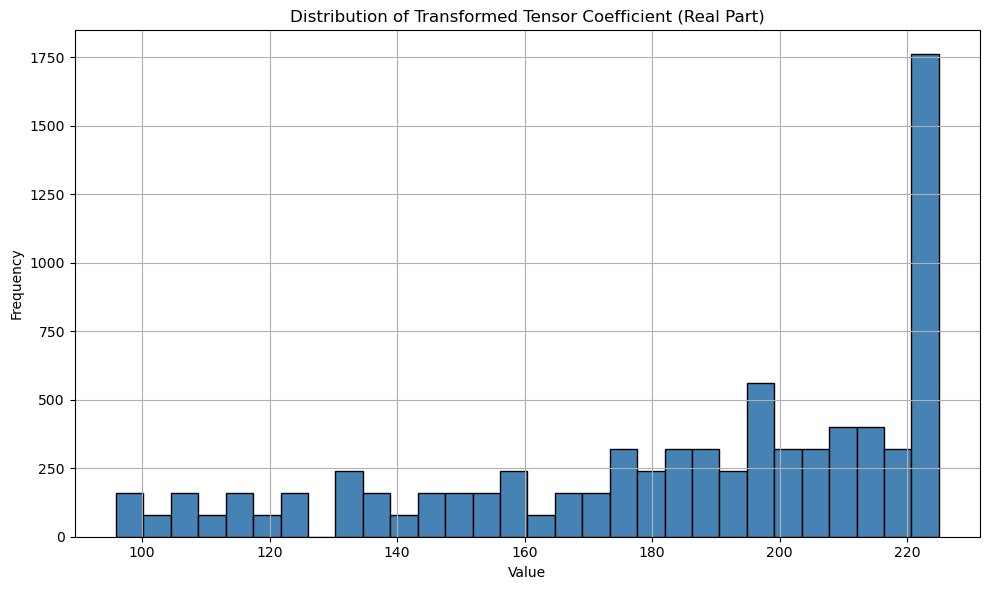

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
alpha, beta, gamma = sp.symbols('alpha beta gamma')
iso, delta_xx, delta_yy, delta = sp.symbols('iso delta_xx delta_yy delta')

# Example expression list (replace this with your actual one)
# Assuming T_transformed_simplified is already defined
# For example: T_transformed_simplified = [some sympy expressions...]
# Here we mock one expression for illustration:
# T_transformed_simplified = [some complex expression involving alpha, beta, gamma, etc.]

# Select the expression you want to scan
expr = T_transformed_simplified[2]*np.sqrt(2/3) # use your actual expression index here

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # 510 - 285 = 225
delta_val = iso_val -delta_zz_val  # 170 - 225 = -55

# Create a lambdified function for fast numeric evaluation
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")

# Define scan grid
alpha_vals = np.linspace(0, 2 * np.pi, 20)
beta_vals = np.linspace(0, np.pi, 20)
gamma_vals = np.linspace(0, 2 * np.pi, 20)

# Storage for results
results = []

# Evaluate on grid
for a in alpha_vals:
    for b in beta_vals:
        for g in gamma_vals:
            try:
                value = expr_func(a, b, g, iso_val, delta_xx_val, delta_yy_val, delta_zz_val)
                results.append(((a, b, g), np.real(value)+ iso_val))  # Add iso_val to the result
            except Exception as e:
                print(f"Error at (α={a:.2f}, β={b:.2f}, γ={g:.2f}): {e}")

# Print a few results
# for orientation, val in results[:5]:
#     a, b, g = orientation
#     print(f"(α={a:.2f}, β={b:.2f}, γ={g:.2f}) → {val:.2f}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist([val for _, val in results], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Transformed Tensor Coefficient (Real Part)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
D_2

Matrix([
[exp(2*I*alpha)*exp(2*I*gamma)*WignerD(2, -2, -2, 0, beta, 0), exp(2*I*alpha)*exp(I*gamma)*WignerD(2, -2, -1, 0, beta, 0), exp(2*I*alpha)*WignerD(2, -2, 0, 0, beta, 0), exp(2*I*alpha)*exp(-I*gamma)*WignerD(2, -2, 1, 0, beta, 0), exp(2*I*alpha)*exp(-2*I*gamma)*WignerD(2, -2, 2, 0, beta, 0)],
[  exp(I*alpha)*exp(2*I*gamma)*WignerD(2, -1, -2, 0, beta, 0),   exp(I*alpha)*exp(I*gamma)*WignerD(2, -1, -1, 0, beta, 0),   exp(I*alpha)*WignerD(2, -1, 0, 0, beta, 0),   exp(I*alpha)*exp(-I*gamma)*WignerD(2, -1, 1, 0, beta, 0),   exp(I*alpha)*exp(-2*I*gamma)*WignerD(2, -1, 2, 0, beta, 0)],
[                exp(2*I*gamma)*WignerD(2, 0, -2, 0, beta, 0),                 exp(I*gamma)*WignerD(2, 0, -1, 0, beta, 0),                 WignerD(2, 0, 0, 0, beta, 0),                 exp(-I*gamma)*WignerD(2, 0, 1, 0, beta, 0),                 exp(-2*I*gamma)*WignerD(2, 0, 2, 0, beta, 0)],
[  exp(-I*alpha)*exp(2*I*gamma)*WignerD(2, 1, -2, 0, beta, 0),   exp(-I*alpha)*exp(I*gamma)*WignerD(2, 1, -1, 0, be

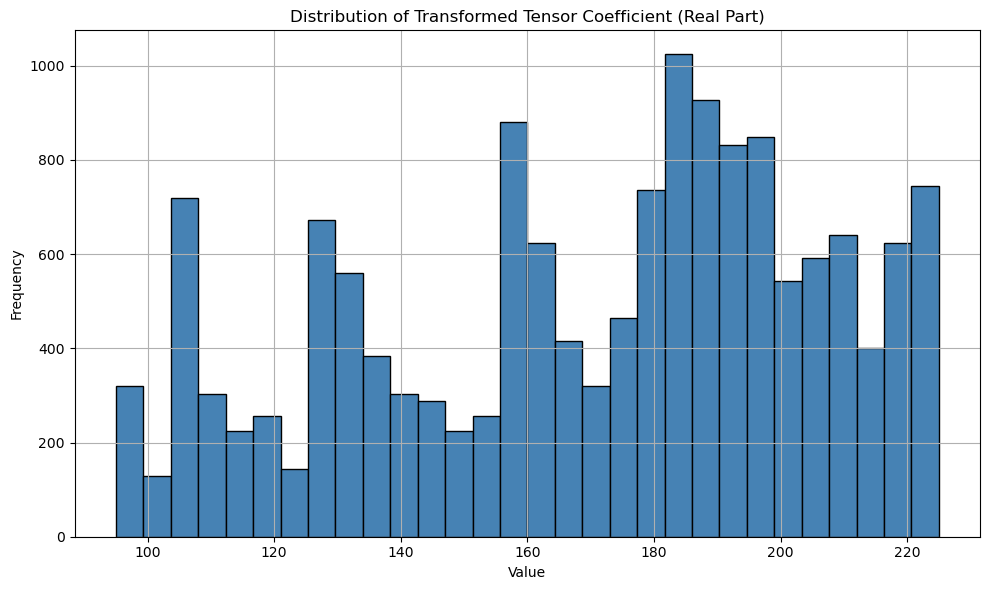

In [6]:
# This code uses the quadpy library to perform numerical integration over SO(3) using spherical coordinates.
# due to limited number of points, the results is not accurate, but it demonstrates the process of sampling orientations and evaluating the transformed tensor coefficients.
import quadpy
import numpy as np
from scipy.spatial.transform import Rotation as R

# Use one of the supported SO(3) integration schemes
scheme = quadpy.u3.get_good_scheme(44)  # Example scheme
#scheme.show()

# Points are quaternions (x, y, z, w)
points = scheme.points  # shape (3, n)
weights = scheme.weights     # shape (n,)


x, y, z = points
beta_vals = np.arccos(z)            # polar angle
alpha_vals = np.arctan2(y, x)       # azimuth angle

# For gamma, sample uniformly
n_gamma = 20
gamma_vals = np.linspace(0, 2*np.pi, n_gamma, endpoint=False)

alpha, beta, gamma = sp.symbols('alpha beta gamma')
iso, delta_xx, delta_yy, delta = sp.symbols('iso delta_xx delta_yy delta')


expr = T_transformed_simplified[2]*np.sqrt(2/3) # use your actual expression index here

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # 510 - 285 = 225
delta_val = iso_val -delta_zz_val  # 170 - 225 = -55

# Create a lambdified function for fast numeric evaluation
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")

# Evaluate expr_func for each gamma and average
results = []
for a, b, w in zip(alpha_vals, beta_vals, weights):
    for g in gamma_vals:
        val = expr_func(a, b, g, iso_val, delta_xx_val, delta_yy_val, delta_zz_val)
        results.append(((a, b, g), np.real(val)+ iso_val))  # Add iso_val to the result


# plot histogram
plt.figure(figsize=(10, 6))
plt.hist([val for _, val in results], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Transformed Tensor Coefficient (Real Part)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



iso_val: 170, delta_xx_val: 95, delta_yy_val: 190, delta_zz_val: 225, delta_val: 55, ital_val: 1.7272727272727273


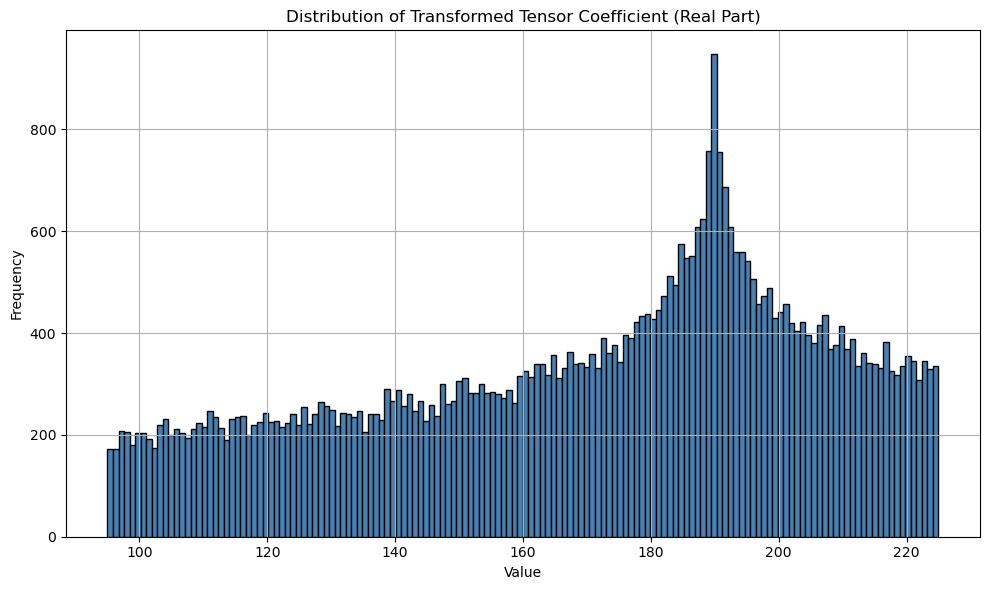

Monte Carlo integration result: 169.83 ppm


In [7]:
# using Monte Carlo integration
import quadpy
import numpy as np
from scipy.spatial.transform import Rotation as R


N = 50000
rot = R.random(num=N)        # random rotations
alpha_vals, beta_vals, gamma_vals = rot.as_euler('zyz', degrees=False).T


alpha, beta, gamma = sp.symbols('alpha beta gamma')
iso, delta_xx, delta_yy, delta = sp.symbols('iso delta_xx delta_yy delta')


expr = T_transformed_simplified[2]*np.sqrt(2/3) # use your actual expression index here

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # 510 - 285 = 225
delta_val = -iso_val +delta_zz_val  # 170 - 225 = -55
ital_val = (delta_yy_val-delta_xx_val)/delta_val  # This is not used in the expression, but kept for consistency
print(f"iso_val: {iso_val}, delta_xx_val: {delta_xx_val}, delta_yy_val: {delta_yy_val}, delta_zz_val: {delta_zz_val}, delta_val: {delta_val}, ital_val: {ital_val}")
# Create a lambdified function for fast numeric evaluation
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")

# Evaluate expr_func for each gamma and average
results = []
for a, b, g in zip(alpha_vals, beta_vals, gamma_vals):
    val = expr_func(a, b, g, iso_val, delta_xx_val, delta_yy_val, delta_zz_val)
    results.append(((a, b, g), np.real(val)+ iso_val))  # Add iso_val to the result


# plot histogram
plt.figure(figsize=(10, 6))
plt.hist([val for _, val in results], bins=150, color='steelblue', edgecolor='black')
plt.title('Distribution of Transformed Tensor Coefficient (Real Part)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Monte Carlo integration result: {np.mean([val for _, val in results]):.2f} ppm")

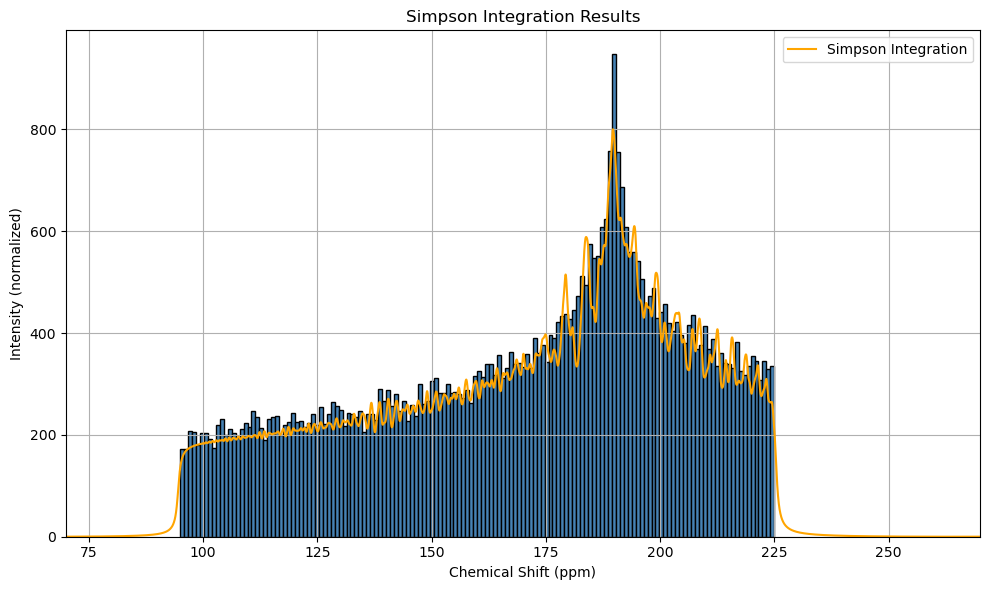

In [8]:
# read simpson resulsts
import pandas as pd

df1=pd.read_csv('/Users/yunyao_1/Dropbox/KcsA/analysis/simpson/statics.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

SW =20000
ref_ppm = 170
NP=8192
nuclus_freq= 100
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

#plot simpson results

plt.figure(figsize=(10, 6))
plt.plot(x_axis, df1.real*800, label='Simpson Integration', color='orange')
# plot Monte Carlo results as bar plot
plt.hist([val for _, val in results], bins=150, color='steelblue', edgecolor='black')
plt.title('Simpson Integration Results')
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Intensity (normalized)')
plt.xlim(start_x, end_x)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
# a simple example of using sympy to calculate Wigner d-matrix elements
from sympy.physics.quantum.spin import Rotation
d_val = Rotation.d(2,1, -1, 0.2)
# Evaluate numerically
d_num = d_val.doit().evalf()
print(d_num)


0.0295027919191783


### Code to show the equivalence of two ways to calculate Wigner D matrix

In [10]:
# verify the correctness of the Wigner d-matrix D_2
#calculate the numerical values for alpha, beta, gamma
import numpy as np
import math
from math import factorial as fact
alpha_val = 0.1  # Example value in radians
beta_val = 0.2   # Example value in radians
gamma_val = 0.3  # Example value in radians
#D_2_numeric = D_2.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val}).doit().evalf()
D_2 = np.zeros((2*2+1, 2*2+1), dtype=complex)
for i, mp in enumerate(range(-2, 3)):
    for j, m in enumerate(range(-2, 3)):
        D_2[i, j]= Rotation.D(2, mp, m, alpha_val,beta_val, gamma_val).doit().evalf()
        #D_2[i, j] = np.exp(-1j * mp * alpha_val) * d * np.exp(-1j * m * gamma_val)
#D_2_numeric = Rotation.D(2, alpha_val, beta_val, gamma_val).doit().evalf()

# Known working Wigner d-matrix for l=2

def little_d(l, mp, m, beta):
    """
    Compute small-d matrix element d^l_{mp,m}(beta) using Wikipedia convention 
    """
    sum_k = 0
    kmin = max(0, m - mp)
    kmax = min(l + m, l - mp)

    prefactor = np.sqrt(fact(l + mp) * fact(l - mp) * fact(l + m) * fact(l - m))

    for k in range(kmin, kmax + 1):
        denom = (
            fact(l + m - k)
            * fact(k)
            * fact(l - mp - k)
            * fact(k + mp - m)
        )
        if denom == 0:
            continue  # skip undefined terms
        term = ((-1)**(k + mp - m)/ denom *
                (np.cos(beta / 2) ** (2 * l + m - mp - 2 * k)) *
                (np.sin(beta / 2) ** (2 * k + mp - m)))
        sum_k += term

    return prefactor * sum_k

def wigner_d_matrix(l, alpha, beta, gamma):
    """
    Compute Wigner D-matrix D^l_{m', m}(alpha, beta, gamma)
    without using scipy.special
    """
    m_vals = np.arange(-l, l+1)
    D = np.zeros((2*l+1, 2*l+1), dtype=complex)

    # def little_d(l, mp, m, beta):
    #     """Compute small-d matrix element d^l_{mp,m}(beta)"""
    #     sum_k = 0
    #     kmin = max(0, m - mp)
    #     kmax = min(l + m, l - mp)
    #     for k in range(kmin, kmax + 1):
    #         num = ((-1)**k *
    #                np.sqrt(fact(l + mp) * fact(l - mp) * fact(l + m) * fact(l - m)))
    #         denom = (fact(l + m - k) * fact(l - mp - k) * fact(k) * fact(k + mp - m))
    #         term = (num / denom *
    #                 (np.cos(beta / 2) ** (2 * l + m - mp - 2 * k)) *
    #                 (np.sin(beta / 2) ** (2 * k + mp - m)))
    #         sum_k += term
    #     return sum_k

    

    for i, mp in enumerate(m_vals):
        for j, m in enumerate(m_vals):
            d = little_d(l, mp, m, beta)
            D[i, j] = np.exp(-1j * mp * alpha) * d * np.exp(-1j * m * gamma)

    return D

# Verify the correctness of the Wigner d-matrix D_2
D_2_test = wigner_d_matrix(2, alpha_val, beta_val, gamma_val)
# Check if the numerical values match
D_2_numeric = np.array(D_2)
D_2_test = np.array(D_2_test)

print(D_2_numeric.shape, D_2_test.shape)
#print(np.allclose(D_2_numeric, D_2_test))
if np.allclose(D_2_numeric, D_2_test):
    print("The Wigner d-matrix D_2 is correct.")
else:
    print("The Wigner d-matrix D_2 is incorrect.")
#print(D_2_test)
#print(D_2_numeric)


(5, 5) (5, 5)
The Wigner d-matrix D_2 is correct.


## Relaxation part

In [11]:
# calculate the correlation coefficients 
# multiplication of T_transformed_simplified 2 and 4 is the correlation coefficient
# based on NMR theory, the correlation coefficient is the product of T_2m[1] and T_2m[3] # index starts from 0 in Python, so we use 1 and 3
# calculate the T_2m[1] and T_2m[3] terms from T_transformed_simplified

# read orientation angles from MD simulation
import numpy as np
data = np.load("/Users/yunyao_1/Dropbox/KcsA/analysis/results/kcsa_5us_sigma_orientations.npz", allow_pickle=True)
sigma_33_dict = data['sigma_33'].item()  # Use `.item()` to extract the dictionary
sigma_22_dict = data['sigma_22'].item()
sigma_11_dict = data['sigma_11'].item()

# the above are the principle vectors of x, y, z   
# each is a dictionary with key as chain ID and value (frame, residue, x, y, z)
# covert it into euler angles 
from scipy.spatial.transform import Rotation as R
import numpy as np

def calculate_euler_angles(ori_t, convention='ZYZ'):
    """
    Calculate Euler angles from orientation matrices.

    Parameters:
        ori_t (np.ndarray): Orientation matrices, shape (num_frames, num_residues, 3, 3).
        convention (str): Euler angle convention, e.g., 'ZYX', 'ZXZ', etc.

    Returns:
        np.ndarray: Euler angles, shape (num_frames, num_residues, 3) for yaw, pitch, roll.
    """
    num_frames, num_residues = ori_t.shape[:2]
    euler_angles = np.zeros((num_frames, num_residues, 3))
    
    for frame in range(num_frames):
        for residue in range(num_residues):
            # Extract the 3x3 rotation matrix for this frame and residue
            rotation_matrix = ori_t[frame, residue]
            # Convert to Euler angles
            euler_angles[frame, residue] = R.from_matrix(rotation_matrix).as_euler(convention, degrees=True)
    
    return euler_angles

ori_t={}
for chain in ['A', 'B', 'C', 'D']:
    # Stack the sigma arrays along the last axis
    ori_t[chain] = np.stack(
        (sigma_33_dict[chain], sigma_22_dict[chain], sigma_11_dict[chain]),
        axis=-1
    )  # frame, resi_num, 3, 3

# calculate euler angles
euler_angles = {}
for chain in ['A', 'B', 'C', 'D']:
    euler_angles[chain] = calculate_euler_angles(ori_t[chain], convention='ZYZ')  # shape (num_frames, num_residues, 3)


In [12]:
import sympy as sp
import numpy as np

# Define symbols
alpha, beta, gamma = sp.symbols('alpha beta gamma')
iso, delta_xx, delta_yy, delta_zz = sp.symbols('iso delta_xx delta_yy delta_zz')

# Use your actual expression
expr = T_transformed_simplified[1]

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # = 225

# Convert expression to numerical function
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")

# Convert Euler angles to radians
alpha_vals = euler_angles['A'][:, :, 0] * np.pi / 180
beta_vals  = euler_angles['A'][:, :, 1] * np.pi / 180
gamma_vals = euler_angles['A'][:, :, 2] * np.pi / 180

# Prepare output array with complex dtype
A_results = np.full(alpha_vals.shape, np.nan + 0j, dtype=np.complex128)

# Evaluate only for valid (non-NaN) entries
for i in range(alpha_vals.shape[0]):
    for j in range(alpha_vals.shape[1]):
        a = alpha_vals[i, j]
        b = beta_vals[i, j]
        g = gamma_vals[i, j]

        if np.any(np.isnan([a, b, g])):
            continue  # Skip invalid entries
        try:
            val = expr_func(a, b, g, iso_val, delta_xx_val, delta_yy_val, delta_zz_val)
            A_results[i, j] = val
        except Exception as e:
            print(f"Error at ({i},{j}): {e}")
            continue

print(f"Chain A T2m[1] results shape: {A_results.shape}")


Chain A T2m[1] results shape: (40001, 7)


In [13]:
# convert above into a function
import sympy as sp
import numpy as np

def evaluate_tensor_component(expr, delta_xx_val, delta_yy_val, delta_zz_val, euler_angles):
    """
    Evaluate a tensor component expression over a grid of Euler angles.

    Parameters:
    -----------
    expr : sympy.Expr
        The symbolic expression to evaluate. Must depend on alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz.
    delta_xx_val : float
        Value of delta_xx (shielding tensor component).
    delta_yy_val : float
        Value of delta_yy (shielding tensor component).
    iso_val : float
        Isotropic shielding value.
    euler_angles : np.ndarray
        Array of Euler angles in degrees with shape (N, M, 3) representing (alpha, beta, gamma).

    Returns:
    --------
    A_results : np.ndarray
        Evaluated complex results for each Euler angle, shape (N, M), dtype=complex128.
    """
    # Calculate delta_zz from isotropic constraint
    iso_val = 1/3*(delta_xx_val + delta_yy_val + delta_zz_val)

    # Declare symbolic variables
    alpha, beta, gamma = sp.symbols('alpha beta gamma')
    iso, delta_xx, delta_yy, delta_zz = sp.symbols('iso delta_xx delta_yy delta_zz')

    # Compile the expression to a fast numerical function
    expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")

    # Convert Euler angles from degrees to radians
    alpha_vals = euler_angles[:, :, 0] * np.pi / 180
    beta_vals  = euler_angles[:, :, 1] * np.pi / 180
    gamma_vals = euler_angles[:, :, 2] * np.pi / 180

    # Initialize output array with complex dtype
    A_results = np.full(alpha_vals.shape, np.nan + 0j, dtype=np.complex128)

    # Loop through each Euler angle triple and evaluate
    for i in range(alpha_vals.shape[0]):
        for j in range(alpha_vals.shape[1]):
            a = alpha_vals[i, j]
            b = beta_vals[i, j]
            g = gamma_vals[i, j]

            if np.any(np.isnan([a, b, g])):
                continue
            try:
                val = expr_func(a, b, g, iso_val, delta_xx_val, delta_yy_val, delta_zz_val)
                A_results[i, j] = val
            except Exception as e:
                print(f"Error evaluating at ({i},{j}): {e}")
                continue

    return A_results


In [55]:
# calculate T_2m[1] for chain A
A_T2m1 = evaluate_tensor_component(
    expr=T_transformed_simplified[1],
    delta_xx_val=delta_xx_val,
    delta_yy_val=delta_yy_val,
    delta_zz_val=delta_zz_val   ,
    euler_angles=euler_angles['A'])

#calculate T_2m[3] for chain A
A_T2m3 = evaluate_tensor_component(
    expr=T_transformed_simplified[3],
    delta_xx_val=delta_xx_val,
    delta_yy_val=delta_yy_val,
    delta_zz_val=delta_zz_val   ,

    euler_angles=euler_angles['A'])

# conput Y seriers
Y_series_A = {}
for m in range(-2, 3):
    if m == -2:
        Y_series_A[m] = evaluate_tensor_component(
            expr=T_transformed_simplified[0],
            delta_xx_val=delta_xx_val,
            delta_yy_val=delta_yy_val,
            delta_zz_val=delta_zz_val   ,
            euler_angles=euler_angles['A'])
    elif m == -1:
        Y_series_A[m] = evaluate_tensor_component(
            expr=T_transformed_simplified[1],
            delta_xx_val=delta_xx_val,
            delta_yy_val=delta_yy_val,
            delta_zz_val=delta_zz_val   ,
            euler_angles=euler_angles['A'])
    elif m == 0:
        Y_series_A[m] = evaluate_tensor_component(
            expr=T_transformed_simplified[2],
            delta_xx_val=delta_xx_val,
            delta_yy_val=delta_yy_val,
            delta_zz_val=delta_zz_val,
            euler_angles=euler_angles['A'])
    elif m == 1:
        Y_series_A[m] = evaluate_tensor_component(
            expr=T_transformed_simplified[3],
            delta_xx_val=delta_xx_val,
            delta_yy_val=delta_yy_val,
            delta_zz_val=delta_zz_val,
            euler_angles=euler_angles['A'])   
    elif m == 2:
        Y_series_A[m] = evaluate_tensor_component(
            expr=T_transformed_simplified[4],
            delta_xx_val=delta_xx_val,
            delta_yy_val=delta_yy_val,
            delta_zz_val=delta_zz_val   ,
            euler_angles=euler_angles['A'])

# calculate the correlation coefficient

# we need update compute_correlation_matrix to handle multiple residues
def compute_correlation_matrix(Y_series, max_lag=1000):
    l = max(Y_series.keys())
    corr_matrix = {}
    for m1 in range(-l, l + 1):
        for m2 in range(-l, l + 1):
            corr = []
            y1 = Y_series[m1]
            y2 = Y_series[m2]
            for tau in range(max_lag//10):
                val = np.mean(y1[:-tau or None] * np.conj(y2[tau:])) if tau > 0 else np.mean(y1 * np.conj(y2))
                corr.append(val)
            corr_matrix[(m1, m2)] = np.array(corr)
    return corr_matrix




In [27]:
# now calculat for all chains
chains = ['A', 'B', 'C', 'D']
Y_series = {}
for chain in chains:
    Y_series[chain] = {}
    for m in range(-2, 3):
        if m == -2:
            Y_series[chain][m] = evaluate_tensor_component(
                expr=T_transformed_simplified[0],
                delta_xx_val=delta_xx_val,
                delta_yy_val=delta_yy_val,
                delta_zz_val=delta_zz_val,
                euler_angles=euler_angles[chain])
        elif m == -1:
            Y_series[chain][m] = evaluate_tensor_component(
                expr=T_transformed_simplified[1],
                delta_xx_val=delta_xx_val,
                delta_yy_val=delta_yy_val,
                delta_zz_val=delta_zz_val,
                euler_angles=euler_angles[chain])
        elif m == 0:
            Y_series[chain][m] = evaluate_tensor_component(
                expr=T_transformed_simplified[2],
                delta_xx_val=delta_xx_val,
                delta_yy_val=delta_yy_val,
                delta_zz_val=delta_zz_val,
                euler_angles=euler_angles[chain])
        elif m == 1:
            Y_series[chain][m] = evaluate_tensor_component(
                expr=T_transformed_simplified[3],
                delta_xx_val=delta_xx_val,
                delta_yy_val=delta_yy_val,
                delta_zz_val=delta_zz_val,
                euler_angles=euler_angles[chain])   
        elif m == 2:
            Y_series[chain][m] = evaluate_tensor_component(
                expr=T_transformed_simplified[4],
                delta_xx_val=delta_xx_val,
                delta_yy_val=delta_yy_val,
                delta_zz_val=delta_zz_val,
                euler_angles=euler_angles[chain])

In [ ]:
corr_matrix_A = []

for i in range(euler_angles['A'].shape[1]):
    print(f"Processing residue {i+74} in chain A/...")
    Y_series = {m: Y_series_A[m][:, i] for m in Y_series_A.keys()}
    corr_matrix_A.append(compute_correlation_matrix(Y_series, max_lag=40000))

Processing residue 74 in chain A/...
Processing residue 75 in chain A/...
Processing residue 76 in chain A/...
Processing residue 77 in chain A/...
Processing residue 78 in chain A/...
Processing residue 79 in chain A/...
Processing residue 80 in chain A/...


In [28]:
print(f"Available chains in Y_series: {list(Y_series.keys())}")

Available chains in Y_series: ['A', 'B', 'C', 'D']


In [29]:
# now calculate the correlation matrix for all chains and all residues
chains = ['A', 'B', 'C', 'D']
corr_matrices = {}
for chain in chains:
    corr_matrices[chain] = []
    for i in range(euler_angles[chain].shape[1]):
        print(f"Processing residue {i+74} in chain {chain}/...")
        Y_series_chain = {m: Y_series[chain][m][:, i] for m in Y_series[chain].keys()}
        corr_matrices[chain].append(compute_correlation_matrix(Y_series_chain, max_lag=1000))

Processing residue 74 in chain A/...
Processing residue 75 in chain A/...
Processing residue 76 in chain A/...
Processing residue 77 in chain A/...
Processing residue 78 in chain A/...
Processing residue 79 in chain A/...
Processing residue 80 in chain A/...
Processing residue 74 in chain B/...
Processing residue 75 in chain B/...
Processing residue 76 in chain B/...
Processing residue 77 in chain B/...
Processing residue 78 in chain B/...
Processing residue 79 in chain B/...
Processing residue 80 in chain B/...
Processing residue 74 in chain C/...
Processing residue 75 in chain C/...
Processing residue 76 in chain C/...
Processing residue 77 in chain C/...
Processing residue 78 in chain C/...
Processing residue 79 in chain C/...
Processing residue 80 in chain C/...
Processing residue 74 in chain D/...
Processing residue 75 in chain D/...
Processing residue 76 in chain D/...
Processing residue 77 in chain D/...
Processing residue 78 in chain D/...
Processing residue 79 in chain D/...
P

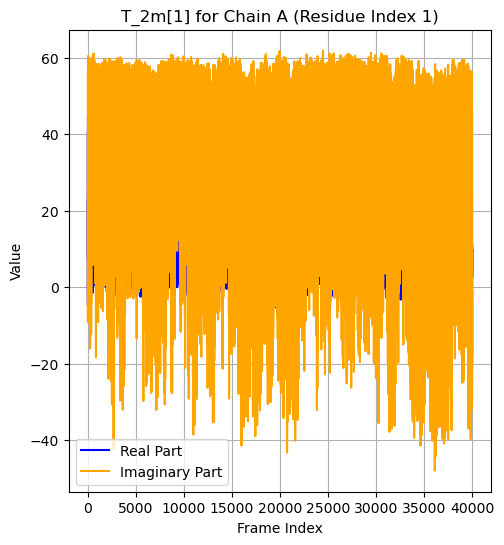

In [18]:
# troubleshooting code: How to do normalization and why we need it?
# plot out the A_T2m1 and A_T2m3 results
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(np.abs(A_T2m1), cmap='viridis', aspect='auto')
# plt.title('T_2m[1] for Chain A')
# plt.colorbar(label='Magnitude')
# plt.xlabel('Residue Index')
# plt.ylabel('Frame Index')   

# plot only one residue index 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(A_T2m1[:, 1].real, label='Real Part', color='blue')
plt.plot(A_T2m1[:, 1].imag, label='Imaginary Part', color='orange')
plt.title('T_2m[1] for Chain A (Residue Index 1)')
plt.xlabel('Frame Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)  

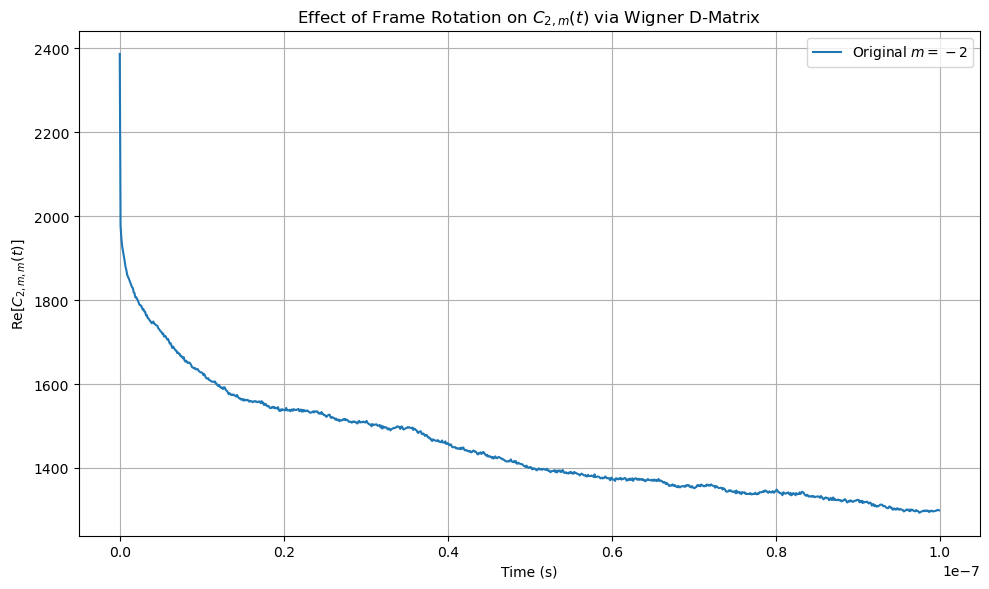

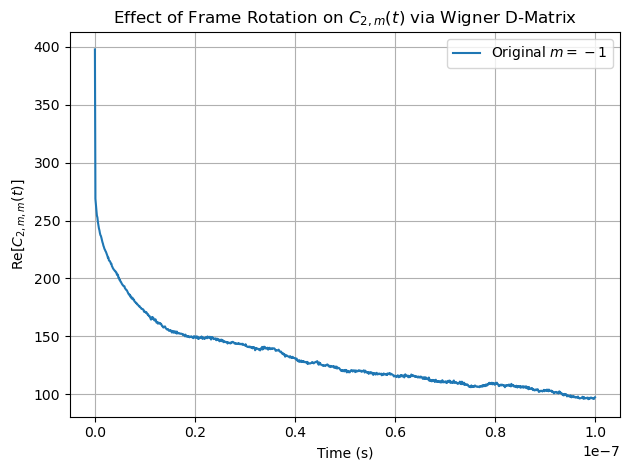

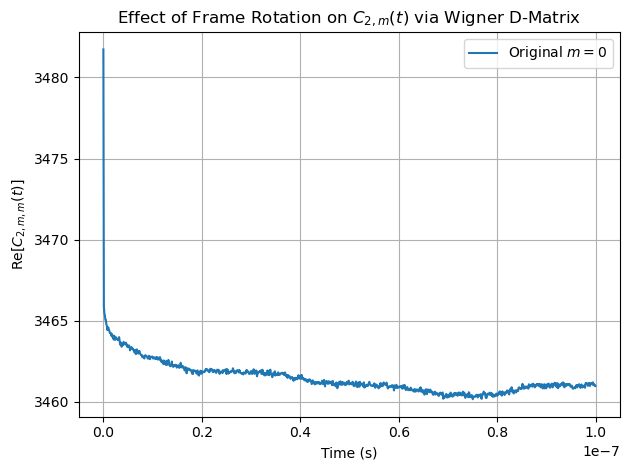

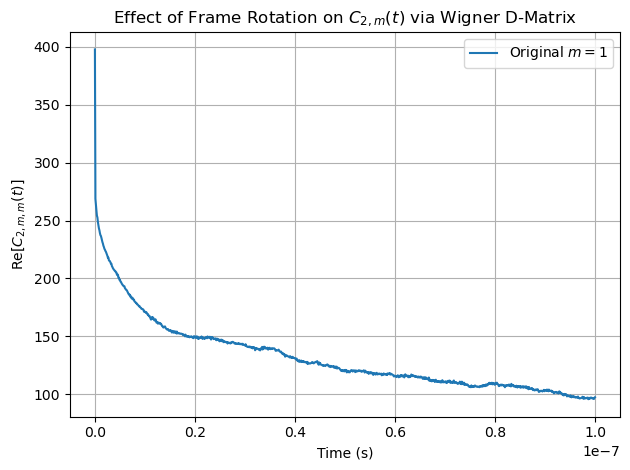

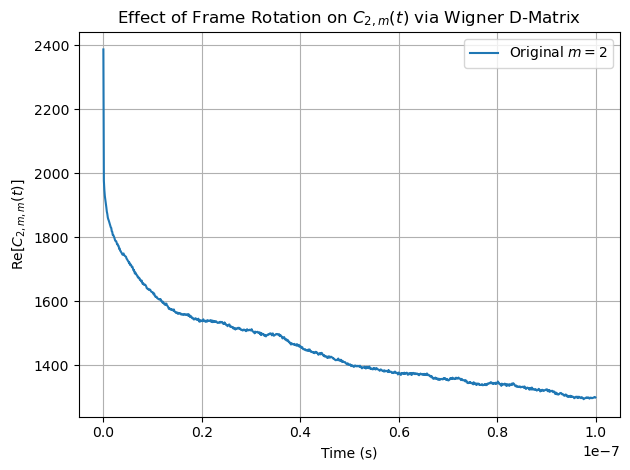

In [19]:
# plot the correlation function for index 0
dt=100*1e-12  # time step in seconds, assuming 100 ps per frame
t = np.arange(len(next(iter(corr_matrix_A[2].values())))) * dt
plt.figure(figsize=(10, 6))
for m in [-2, -1, 0, 1, 2]:
    plt.plot(t, np.real(corr_matrix_A[2][(m, m)]), label=fr'Original $m={m}$', linestyle='-')
    plt.xlabel("Time (s)")
    plt.ylabel(r"$\mathrm{Re}[C_{2,m,m}(t)]$")
    plt.title("Effect of Frame Rotation on $C_{2,m}(t)$ via Wigner D-Matrix")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
# now calculate correlation coefficients for different orientations for chain A residue 75
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.spatial.transform import Rotation as R
import sympy as sp
from sympy.physics.quantum.spin import Rotation as WignerRotation
import numpy as np
import math
from math import factorial as fact
def wigner_d_matrix(l, alpha, beta, gamma):
    """
    Compute Wigner D-matrix D^l_{m', m}(alpha, beta, gamma)
    without using scipy.special
    """
    m_vals = np.arange(-l, l+1)
    D = np.zeros((2*l+1, 2*l+1), dtype=complex)

    def little_d(l, mp, m, beta):
        """Compute small-d matrix element d^l_{mp,m}(beta)"""
        sum_k = 0
        kmin = max(0, m - mp)
        kmax = min(l + m, l - mp)
        for k in range(kmin, kmax + 1):
            num = ((-1)**(k + mp - m) *
                   np.sqrt(fact(l + mp) * fact(l - mp) * fact(l + m) * fact(l - m)))
            denom = (fact(l + m - k) * fact(l - mp - k) * fact(k) * fact(k + mp - m))
            term = (num / denom *
                    (np.cos(beta / 2) ** (2 * l + m - mp - 2 * k)) *
                    (np.sin(beta / 2) ** (2 * k + mp - m)))
            sum_k += term
        return sum_k

    for i, mp in enumerate(m_vals):
        for j, m in enumerate(m_vals):
            d = little_d(l, mp, m, beta)
            D[i, j] = np.exp(-1j * mp * alpha) * d * np.exp(-1j * m * gamma)

    return D

def rotate_correlation_matrix(corr_matrix, l, D):
    """
    Rotate the full correlation matrix using Wigner D-matrix.
    corr_matrix[(m1, m2)] is a function of time.
    D is a (2l+1)x(2l+1) Wigner D-matrix.
    Returns the rotated correlation function C'_m(t) for each m.
    """
    m_vals = np.arange(-l, l + 1)
    corr_rotated = {}

    # Step 1: Construct original correlation matrix as a 3D array
    # Shape: (2l+1, 2l+1, T) where T is length of time array
    T = next(iter(corr_matrix.values())).shape[0]
    Cmat = np.zeros((2*l+1, 2*l+1, T), dtype=complex)
    for i, m1 in enumerate(m_vals):
        for j, m2 in enumerate(m_vals):
            Cmat[i, j, :] = corr_matrix[(m1, m2)]

    # Step 2: Rotate correlation matrix using D
    # D * Cmat * D†
    C_rotated = np.einsum('im,mn...,jn->ij...', D, Cmat, D.conj())

    # Step 3: Extract only the diagonal elements (C'_m(t))
    for i, m in enumerate(m_vals):
        corr_rotated[m] = C_rotated[i, i, :]

    return corr_rotated


l = 2
N = 10000
rot = R.random(num=N)  # random rotations
alpha_vals, beta_vals, gamma_vals = rot.as_euler('zyz', degrees=False).T

corr_rotated_all = []

for idx in range(N):
    alpha = alpha_vals[idx]
    beta = beta_vals[idx]
    gamma = gamma_vals[idx]

    D = wigner_d_matrix(l, alpha, beta, gamma)  # shape (2l+1, 2l+1)

    corr_rotated = rotate_correlation_matrix(corr_matrix_A[1], l, D)
    # convert from dict to numpy array for easier handling
    corr_rotated_array = np.array([corr_rotated[m] for m in range(-l, l + 1)])

    corr_rotated_all.append(corr_rotated_array)


In [ ]:
# expand to all chains and residues
# save the results in a numpy array in shape (1000, nof_chains, nof_residues, 5)
import numpy as np

no_of_chains = len(chains)
no_of_residues = euler_angles[chains[0]].shape[1]
windon_size = 1000  # number of frames to consider
corr_rotated_all = np.zeros((N, no_of_chains, no_of_residues, 2 * l + 1,windon_size), dtype=complex)

for idx in range(N):
    alpha = alpha_vals[idx]
    beta = beta_vals[idx]
    gamma = gamma_vals[idx]

    D = wigner_d_matrix(l, alpha, beta, gamma)  # shape (2l+1, 2l+1)

    for chain_idx, chain in enumerate(chains):
        for i in range(euler_angles[chain].shape[1]):
            corr_rotated = rotate_correlation_matrix(corr_matrices[chain][i], l, D)

            try:
                corr_rotated_array = np.array([corr_rotated[m] for m in range(-l, l + 1)]).astype(complex)
                corr_rotated_all[idx, chain_idx, i, :] = corr_rotated_array
            except KeyError as e:
                print(f"Missing key {e} at chain {chain}, residue {i}, frame {idx}")
            except Exception as e:
                print(f"Error at chain {chain}, residue {i}, frame {idx}: {e}")


# average over the 10000 orientations
corr_rotated_avg = np.mean(corr_rotated_all, axis=0)  # shape (nof_chains, nof_residues, 2 * l + 1, windon_size)



            


OSError: [Errno 28] No space left on device

In [32]:
# Save main data
np.savez_compressed('/Users/yunyao_1/Dropbox/KcsA/analysis/results/rotated_correlation_results.npz', 
                    corr_rotated_avg=corr_rotated_avg, 
                    alpha_vals=alpha_vals, 
                    beta_vals=beta_vals, 
                    gamma_vals=gamma_vals,
                    chains=chains)

# Optionally save euler_angles if needed
import pickle
with open("/Users/yunyao_1/Dropbox/KcsA/analysis/results/euler_angles.pkl", "wb") as f:
    pickle.dump(euler_angles, f)

Average correlation shape: (5, 1000)


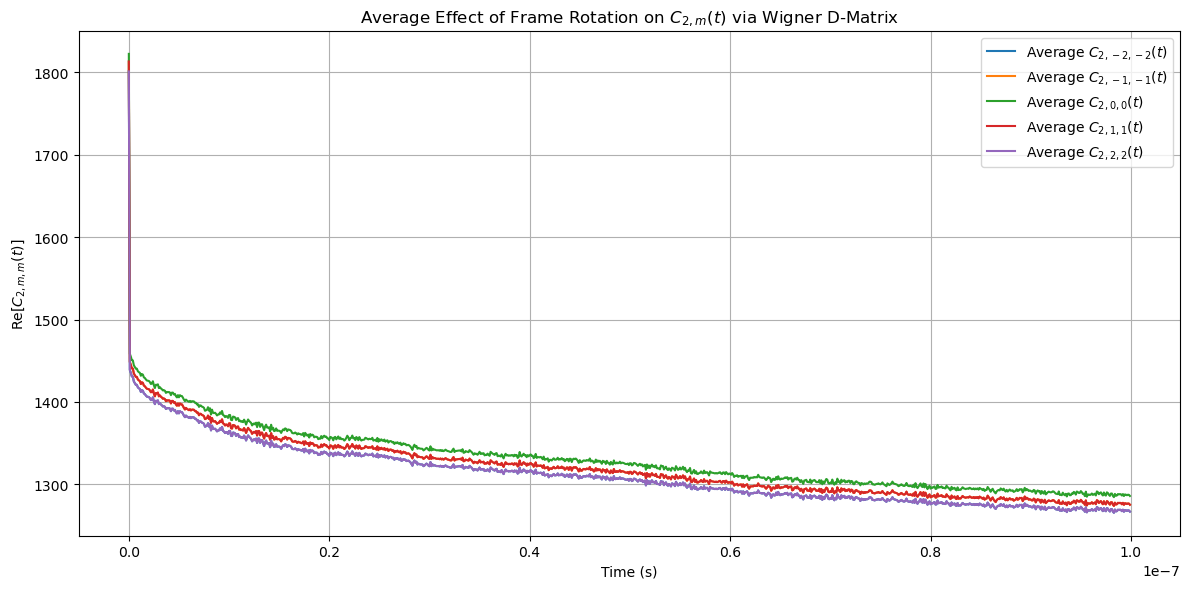

In [ ]:
# plot the average correlation function over all orientations
import matplotlib.pyplot as plt
import numpy as np

# Stack into a 3D array: shape (N, 5, 5)
corr_stack = np.stack(corr_rotated_all, axis=0)  # shape (N, 5, 5)

# Compute the mean across orientations (axis=0)
corr_mean = np.mean(corr_stack, axis=0)  # shape (5, 5)
print(f"Average correlation shape: {corr_mean.shape}")

# plot the average correlation function for each m
m_vals = np.arange(-l, l + 1)  # m = -2, -1, 0, 1, 2
dt = 100 * 1e-12  # time step in seconds, assuming 100 ps per frame
t = np.arange(corr_mean.shape[1]) * dt  # time array    
plt.figure(figsize=(12, 6))
for i, m in enumerate(m_vals):
    plt.plot(t, np.real(corr_mean[i, :]), label=f'Average $C_{{2,{m},{m}}}(t)$', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel(r"$\mathrm{Re}[C_{2,m,m}(t)]$")
plt.title("Average Effect of Frame Rotation on $C_{2,m}(t)$ via Wigner D-Matrix")
plt.legend()
plt.grid(True)
plt.tight_layout()

## let me test if we could fit tau_c and order paramater from the correlation profile

idea: sum over all m and normalize the profile, use normalize profile to fit tau_c and s

In [56]:
# sum all m

corr_matrix_A = []

for i in range(euler_angles['A'].shape[1]):
    print(f"Processing residue {i+74} in chain A/...")
    Y_series = {m: Y_series_A[m][:, i] for m in Y_series_A.keys()}
    corr_matrix_A.append(compute_correlation_matrix(Y_series, max_lag=40000))

corr_sum = np.sum([corr_matrix_A[2][(m, m)] for m in range(-2, 3)], axis=0)  # sum over all m
# normalize
#covert to real part only
corr_sum = np.real(corr_sum)
corr_sum /= np.max(np.abs(corr_sum))



# fit the correltion function
from scipy.optimize import curve_fit

def correlation_model2(t, S2_s, tau_s, S2_f, tau_f):
    return S2_s*(S2_f + (1 - S2_f) * np.exp(-t / tau_f))+(1-S2_s)*np.exp(-t / tau_s)

# fit the correlation function with the new model
def fit_correlation_function2(C_t, dt): 
    t = np.arange(len(C_t)) * dt
    # Initial guesses: S2_s ≈ C_t[-1], tau_s ≈ time when C_t drops to (1+S2_s)/2
    S2_s_guess = C_t[-1]
    half_max = (1 + S2_s_guess) / 2
    tau_s_guess = t[np.argmin(np.abs(C_t - half_max))] if np.any(C_t < half_max) else 0.01
    
    # For the fast component, we can use the same guess for S2_f and tau_f
    S2_f_guess = 0.5  # initial guess for fast component
    tau_f_guess = dt # initial guess for fast component

    popt, pcov = curve_fit(correlation_model2, t, C_t, p0=[S2_s_guess, tau_s_guess, S2_f_guess, tau_f_guess])
    S2_s_fit, tau_s_fit, S2_f_fit, tau_f_fit = popt
    return S2_s_fit, tau_s_fit, S2_f_fit, tau_f_fit, t, correlation_model2(t, *popt)


S2_s_fit, tau_s_fit, S2_f_fit, tau_f_fit, t_fit, C_fit = fit_correlation_function2(corr_sum, dt)
print(f"Fitted parameters: S2_s={S2_s_fit:.3f}, tau_s={tau_s_fit*1e9:.3f} ns, S2_f={S2_f_fit:.3f}, tau_f={tau_f_fit*1e9:.3f} ns")
#print(f"Summed correlation shape: {corr_sum.shape}")




Processing residue 74 in chain A/...
Processing residue 75 in chain A/...
Processing residue 76 in chain A/...
Processing residue 77 in chain A/...
Processing residue 78 in chain A/...
Processing residue 79 in chain A/...
Processing residue 80 in chain A/...
Fitted parameters: S2_s=0.861, tau_s=77.495 ns, S2_f=0.760, tau_f=0.750 ns


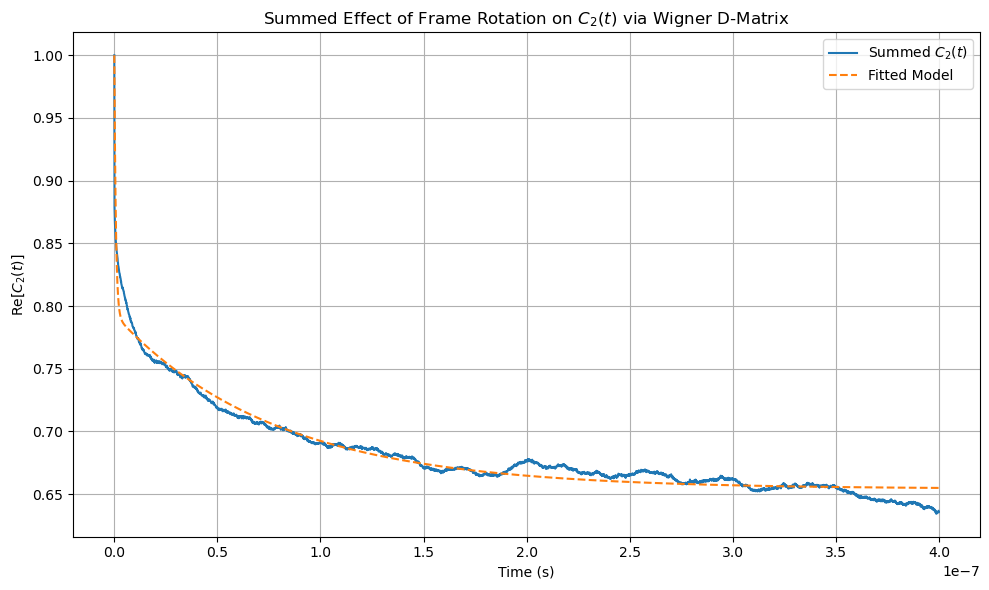

In [57]:
t= np.arange(len(corr_sum)) * dt  # time array for plotting
plt.figure(figsize=(10, 6))
plt.plot(t, np.real(corr_sum), label='Summed $C_{2}(t)$', linestyle='-')
plt.plot(t_fit, C_fit, label='Fitted Model', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel(r"$\mathrm{Re}[C_{2}(t)]$")
plt.title("Summed Effect of Frame Rotation on $C_{2}(t)$ via Wigner D-Matrix")
plt.legend()
plt.grid(True)
plt.tight_layout()

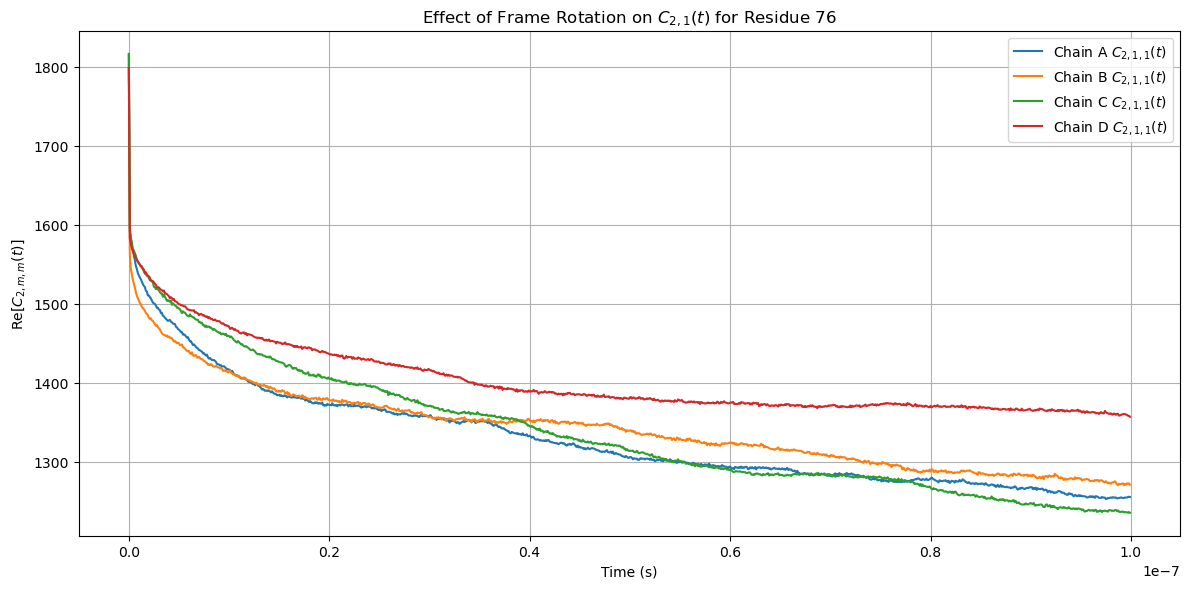

In [33]:
# now compare the correlation function for differnet chains for m=1 and residue 76 (idex 2)
residue_index = 2  # residue 76
m = 1
m_idx = m + l  # convert m to index 
plt.figure(figsize=(12, 6))
for chain_idx, chain in enumerate(chains):
    plt.plot(t, np.real(corr_rotated_avg[chain_idx, residue_index, m_idx, :]), label=f'Chain {chain} $C_{{2,{m},{m}}}(t)$', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel(r"$\mathrm{Re}[C_{2,m,m}(t)]$")
plt.title(f"Effect of Frame Rotation on $C_{{2,{m}}}(t)$ for Residue {residue_index+74}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


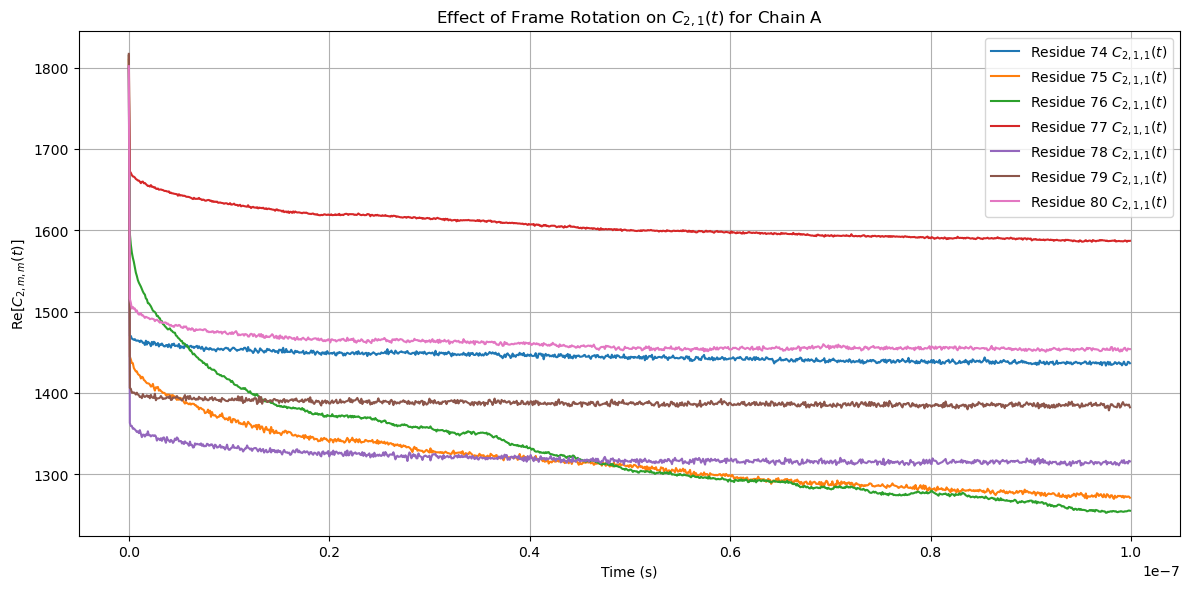

In [34]:
# compare the correlation function for different residues for chain A and m=1
residue_indices = [0, 1, 2, 3, 4,5,6]
m = 1
m_idx = m + l  # convert m to index
plt.figure(figsize=(12, 6))
for residue_index in residue_indices:
    plt.plot(t, np.real(corr_rotated_avg[0, residue_index, m_idx, :]), label=f'Residue {residue_index+74} $C_{{2,{m},{m}}}(t)$', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel(r"$\mathrm{Re}[C_{2,m,m}(t)]$")      
plt.title(f"Effect of Frame Rotation on $C_{{2,{m}}}(t)$ for Chain A")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Now do FFT to calculate spectral density

In [36]:
import numpy as np

def spectral_density_nmr(acf, time_step):
    """
    Calculate spectral density for NMR relaxation from the autocorrelation function.

    Parameters:
    -----------
    acf : numpy.ndarray
        Autocorrelation function (num_lags, num_residues).
    time_step : float
        Time interval between frames.

    Returns:
    --------
    frequencies : numpy.ndarray
        Frequency axis (in same unit as 1/time_step).
    J : numpy.ndarray
        Spectral density (num_freqs, num_residues).
    """
    num_lags, num_residues = acf.shape

    # Zero-padding to improve frequency resolution (optional)
    n_fft = 2 * num_lags

    # FFT without windowing
    fft_result = np.fft.rfft(acf, n=n_fft, axis=0)

    # Real spectral density (normalized properly)
    J = 2 * time_step * np.real(fft_result)

    # Frequencies corresponding to FFT
    frequencies = np.fft.rfftfreq(n_fft, d=time_step)

    return frequencies, J

# visualize spectral density
def visualize_spectral_density(frequencies, J, residues, title="Spectral Density Visualization",    
                              save_as=None):
    """
    Visualize spectral density for specific residues.

    Parameters:
        frequencies (numpy.ndarray): Frequency axis.
        J (numpy.ndarray): Spectral density (num_freqs, num_residues).
        residues (list): List of residue indices to plot (0-indexed).
        title (str): Title of the plot.
        save_as (str): If provided, save the plot to this filename.
    """
    num_residues = len(residues)
    plt.figure(figsize=(10, 6))
    
    for residue in residues:
        if residue >= J.shape[1]:
            raise ValueError(f"Residue index {residue} out of bounds for spectral density.")
        plt.plot(frequencies, J[:, residue], label=f"Residue {residue + 74}")
    
    plt.xlabel("Frequency")
    plt.ylabel("Spectral Density")
    plt.xlim(0, 1.5*10**(9))  # Adjust x-axis limits to 600MHz FOR Carbon nmr (2pi*150MHz)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if save_as:
        plt.savefig(save_as, dpi=300)
        print(f"Plot saved as {save_as}")
    else:
        plt.show()

In [38]:
# test the spectral density function
# acf=  corr_mean[1, :]  # use the last m=1 correlation function
# # expand acf to 2D for consistency
# acf = np.expand_dims(acf, axis=1)  # shape (num_lags
# spectral_density_test= spectral_density_nmr(acf, dt)
# # visualize
# visualize_spectral_density(
#     frequencies=spectral_density_test[0],
#     J=spectral_density_test[1],
#     residues=[0],  # Plot for residues 75, 76, 77 (0-indexed)
#     title="Spectral Density for Chain A Residues 75-77",
# )

In [40]:
# calcualte the numerical values 
time_step = dt  
larmor_frequency = 2 * np.pi * 100e6  # convert 150 MHz to rad/ps

def calculate_J(spectral_density, larmor_frequency):
    """
    Calculate the spectral density J from the spectral density array.

    Parameters:
    -----------
    spectr_density : numpy.ndarray
        Spectral density array (num_freqs, num_residues).
    time_step : float
        Time step in seconds.
    larmor_frequency : float
        Larmor frequency in rad/s.

    Returns:
    --------
    J : numpy.ndarray
        Spectral density J (num_freqs, num_residues).
    """
    freqs=spectral_density[0]
    spe_den= spectral_density[1]

    idx_0 = np.argmin(np.abs(freqs - 0))
    idx_w = np.argmin(np.abs(freqs - larmor_frequency))
    idx_2w = np.argmin(np.abs(freqs - 2 * larmor_frequency))
    
    return spe_den[idx_0], spe_den[idx_w], spe_den[idx_2w]
 
# j_values = calculate_J(spectral_density_test, larmor_frequency)
# print(f"J(0): {j_values[0]}, J(ω): {j_values[1]}, J(2ω): {j_values[2]}")

## calculate T1 value

In [41]:
def calculate_T1(spectral_density, gamma13=2 * np.pi * 10.705e6, B0=14.1):
    """
    Calculate NMR T1 relaxation time using spectral density.

    Parameters:
        spectrum_density (float): Spectral density \( J(\omega_0) \) in rad/s.
        gamma13 (float): Gyromagnetic ratio of 13C (default \( 2 \pi \times 10.705 \times 10^6 \)).
        B0 (float): Magnetic field strength in T (default 14.1 T for 600 MHz).
        #spectral_density (float): Spectral density value to use in the calculation for \( J(\omega_0) \).
 

    Returns:
        float: Calculated \( T_1 \) relaxation time in seconds.
    """

    # Calculate omega0 (Larmor frequency in rad/s)
    omega0 = gamma13 * B0  # units: rad/s

    # J(omega0) is the spectral density at the Larmor frequency
    J_omega0 = calculate_J(spectral_density,larmor_frequency)[1]  # Use the spectral density at omega0
    #print(f"J(omega0) value: {J_omega0:.2e} rad/s")

    R1 =  (omega0**2) *J_omega0* 10**(-12)  # 10**(-12) comes from ppm* ppm in correlation function


    T1 = 1.0 / R1

    return T1

In [ ]:
# calculate T1
T1 = calculate_T1(spectral_density_test, gamma13=2 * np.pi * 10.705e6, B0=14.1)
print(f"Calculated T1 relaxation time: {T1.item():.2f} seconds")

Calculated T1 relaxation time: 9.41 seconds


In [42]:
# code to calculate T1 values for all chains and residues
T1_values = np.zeros((no_of_chains, no_of_residues))
for chain_idx in range(no_of_chains):
    for residue_idx in range(no_of_residues):
        acf = corr_rotated_avg[chain_idx, residue_idx, 1, :]  # m=1
        acf = np.expand_dims(acf, axis=1)  # shape (num_lags, 1)
        spectral_density = spectral_density_nmr(acf, dt)
        T1_values[chain_idx, residue_idx] = calculate_T1(spectral_density, gamma13=2 * np.pi * 10.705e6, B0=14.1)
        print(f"Chain {chains[chain_idx]}, Residue {residue_idx+74}, T1: {T1_values[chain_idx, residue_idx]:.2f} s")

Chain A, Residue 74, T1: 14.80 s
Chain A, Residue 75, T1: 9.39 s
Chain A, Residue 76, T1: 13.22 s
Chain A, Residue 77, T1: 28.33 s
Chain A, Residue 78, T1: 13.41 s
Chain A, Residue 79, T1: 14.17 s
Chain A, Residue 80, T1: 15.03 s
Chain B, Residue 74, T1: 15.81 s
Chain B, Residue 75, T1: 12.24 s
Chain B, Residue 76, T1: 14.29 s
Chain B, Residue 77, T1: 35.25 s
Chain B, Residue 78, T1: 12.02 s
Chain B, Residue 79, T1: 14.01 s
Chain B, Residue 80, T1: 13.74 s
Chain C, Residue 74, T1: 16.03 s
Chain C, Residue 75, T1: 11.92 s
Chain C, Residue 76, T1: 11.69 s
Chain C, Residue 77, T1: 24.53 s
Chain C, Residue 78, T1: 10.37 s
Chain C, Residue 79, T1: 11.93 s
Chain C, Residue 80, T1: 13.72 s
Chain D, Residue 74, T1: 16.04 s
Chain D, Residue 75, T1: 12.03 s
Chain D, Residue 76, T1: 15.83 s
Chain D, Residue 77, T1: 32.63 s
Chain D, Residue 78, T1: 11.63 s
Chain D, Residue 79, T1: 12.75 s
Chain D, Residue 80, T1: 14.87 s


/Users/yunyao_1/miniforge3/envs/nmr_py310/lib/python3.8/site-packages/numpy/fft/_pocketfft.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


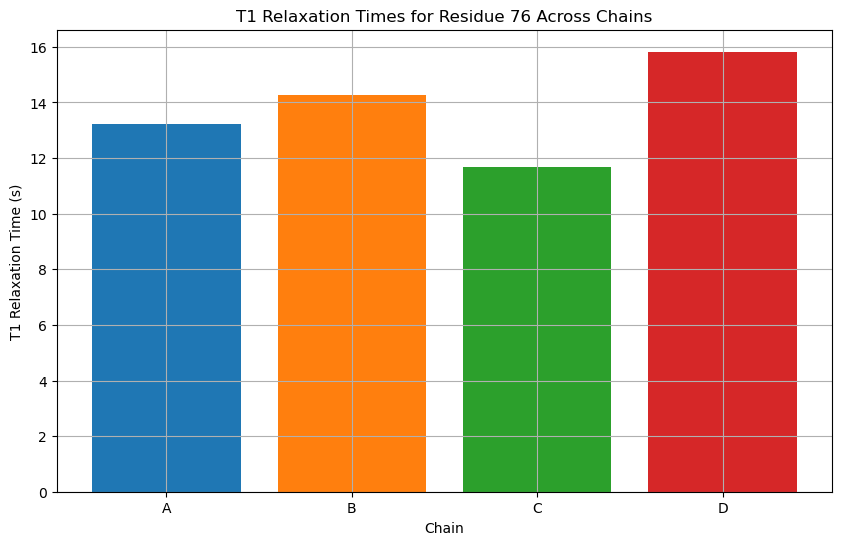

In [43]:
# plot the T1 values for all chains and residue 76
residue_index = 2  # residue 76
plt.figure(figsize=(10, 6))
for chain_idx, chain in enumerate(chains):
    plt.bar(chain, T1_values[chain_idx, residue_index])
plt.xlabel("Chain")
plt.ylabel("T1 Relaxation Time (s)")
plt.title(f"T1 Relaxation Times for Residue {residue_index+74} Across Chains")
plt.grid(True)

Text(0.5, 1.0, 'T1 Relaxation Times for Chain A')

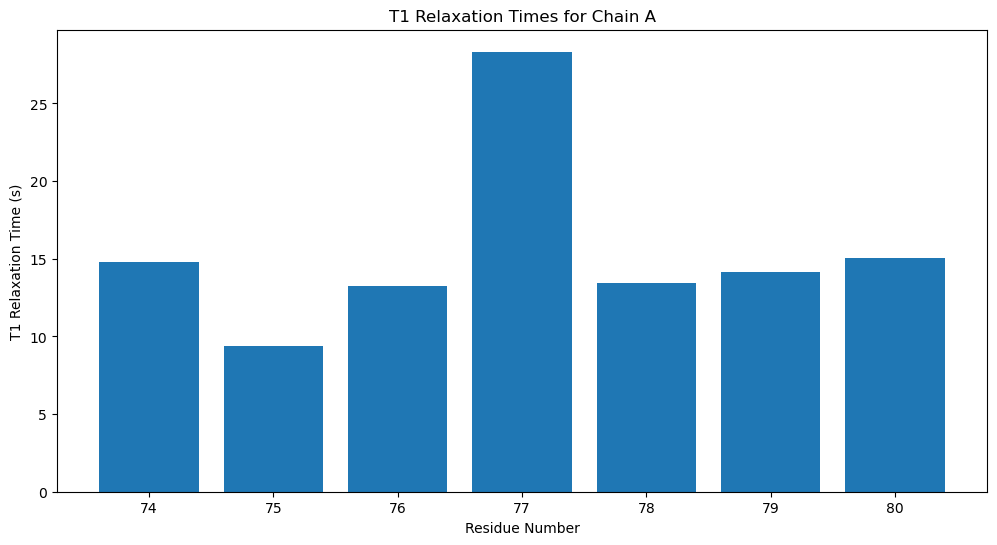

In [44]:
# plot the t1 values for all residues in chain A
chain_idx = 0  # chain A
plt.figure(figsize=(12, 6))
plt.bar(np.arange(no_of_residues) + 74, T1_values[chain_idx, :])
plt.xlabel("Residue Number")
plt.ylabel("T1 Relaxation Time (s)")
plt.title(f"T1 Relaxation Times for Chain {chains[chain_idx]}")     

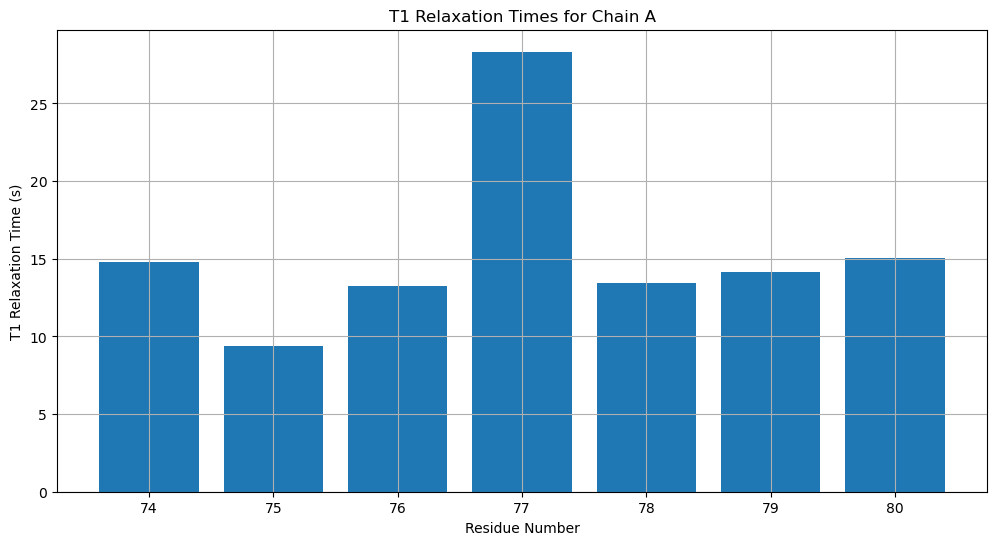

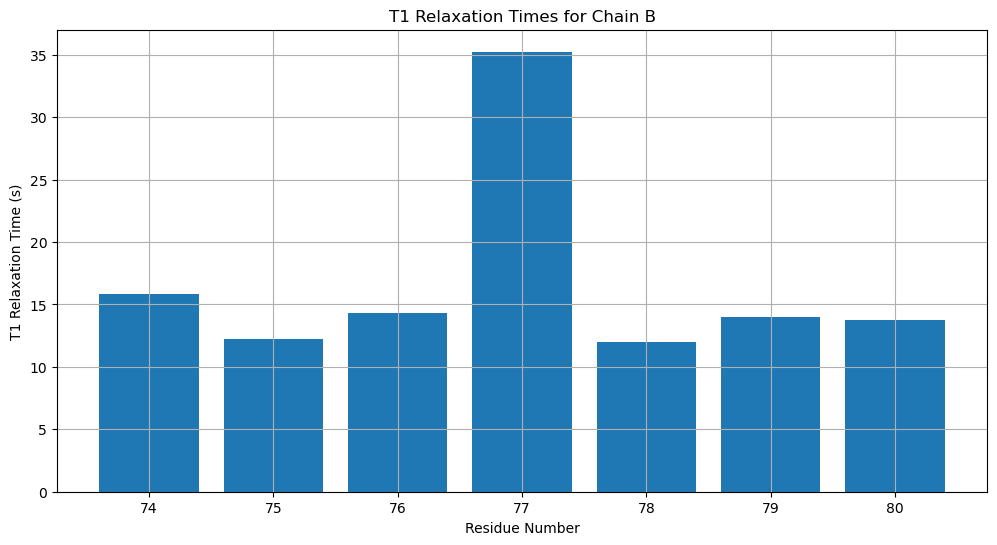

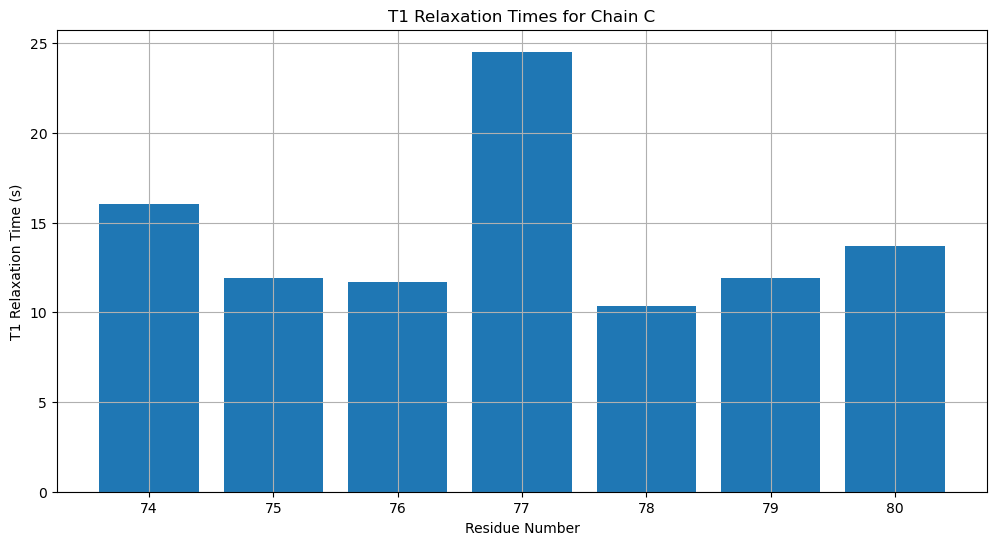

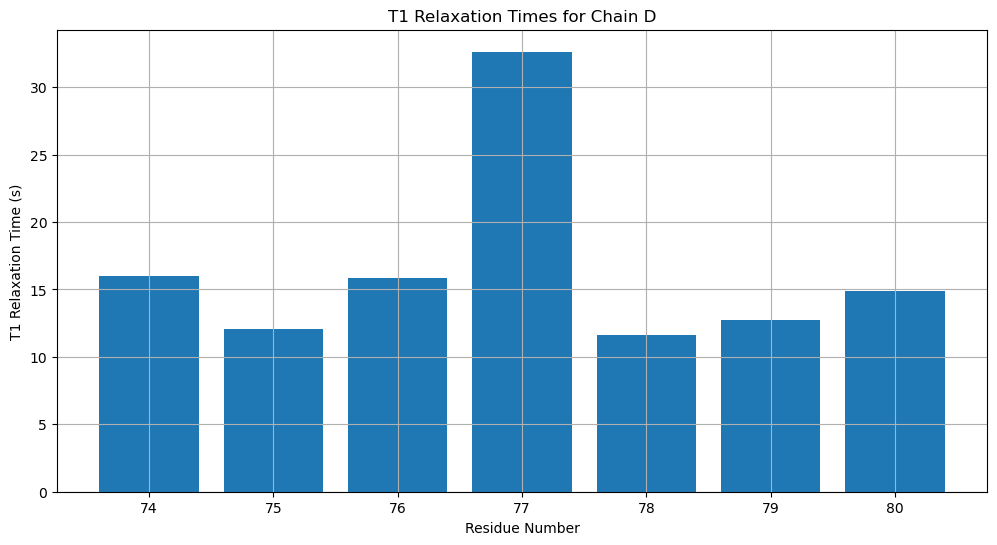

In [45]:
# loop through all chains and plot
for chain_idx, chain in enumerate(chains):
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(no_of_residues) + 74, T1_values[chain_idx, :])
    plt.xlabel("Residue Number")
    plt.ylabel("T1 Relaxation Time (s)")
    plt.title(f"T1 Relaxation Times for Chain {chain}")
    plt.grid(True)
    plt.show()
    

## Dipolar based correlation calculation 

In [ ]:
# in the section, we will calcuulat the correlatin function for the dipolar interaction
# as the CSA tensor is rigid, we could use either axis as dipole axis
# we have calculated the euler angles for the CSA tensor, we can use the same euler angles for the dipolar interaction as a second option


In [ ]:
# simuluate the Pake pattern
# acording to the secular approximation, the Pake pattern is given by the IzBz part (T20 term)

import numpy as np

def generate_random_orientations(n_points):
    """
    Generate n_points orientations uniformly distributed over the unit sphere.
    Returns theta (polar angle) and phi (azimuthal angle).
    """
    phi = 2 * np.pi * np.random.rand(n_points)
    cos_theta = 2 * np.random.rand(n_points) - 1
    theta = np.arccos(cos_theta)
    return theta, phi

def powder_average(observable_function, n_orientations=1000):
    """
    Compute powder average by sampling orientations over the sphere.

    observable_function: function that takes (theta, phi) and returns a scalar value
    n_orientations: number of orientations to sample
    """
    theta, phi = generate_random_orientations(n_orientations)
    values = np.array([observable_function(t, p) for t, p in zip(theta, phi)])
    return np.mean(values)


def chemical_shift_calculator(theta, phi, iso):
    """
    Calculate the chemical shift for a given orientation defined by theta and phi.
    """

    # Calculate the CSA tensor components in the Cartesian basis
    T20 = iso + T_transformed_simplified[0].doit().evalf()*np.sqrt(3/2)
    return T20

In [ ]:
# write a function to calculate the correlation coefficient to be calcuated numerically
import numpy as np
def calculate_transformed_tensor_coefficients(alpha_val, beta_val, gamma_val, iso_val, delta_xx_val, delta_yy_val, delta_val):
    """Calculate the transformed tensor coefficients for given Euler angles and tensor coefficients.
    Args:
        alpha_val (float): Euler angle alpha.
        beta_val (float): Euler angle beta.
        gamma_val (float): Euler angle gamma.
        iso_val (float): Isotropic part of the tensor.
        delta_xx_val (float): Coefficient for xx component.
        delta_yy_val (float): Coefficient for yy component.
        delta_val (float): Coefficient for zz component.
    Returns:
        float: The correlation coefficient calculated from the transformed tensor coefficients.
    """
    # write the corelation _coefficient_simplied as a function without using the sympy library
    #correlation_coefficient_simplified= 

    i = 1j
    sqrt6 = np.sqrt(6)
    
    term1 = -0.25 * (d_xx - d_yy) * (np.cos(beta) - 1) * np.exp(i * alpha)
    term2 = -(
        0.612372435695794 * sqrt6 * delta * np.cos(beta)
        - 0.25 * (d_xx - d_yy) * (np.cos(beta) + 1)
    ) * np.exp(i * (alpha + 2 * gamma))
    
    term3 = 0.25 * (d_xx - d_yy) * (np.cos(beta) - 1) * np.exp(i * alpha)
    term4 = (
        0.612372435695794 * sqrt6 * delta * np.cos(beta)
        - 0.25 * (d_xx - d_yy) * (np.cos(beta) + 1)
    ) * np.exp(i * alpha)
    
    term5 = 0.25 * (d_xx - d_yy) * (np.cos(beta) + 1) * np.exp(i * (alpha + 2 * gamma))
    term6 = 2 * np.exp(-2 * i * (alpha + 2 * gamma)) * np.sin(beta)**2

    result = term1 + term2 + term3 + term4 + term5 + term6
    return result


    return correlation_coefficient
    # Substitute the numerical values into the symbolic expressions
    # Substitute the numerical values into the transformed tensor coefficients  
    

In [ ]:
# test if delta_xx and delta_yy are equal and gamma is zero
test_conditions = sp.simplify(sp.Eq(delta_xx, delta_yy) & sp.Eq(gamma, 0))
test_conditions_result = test_conditions.subs({delta_xx: 1, delta_yy: 1, gamma: 0})
#sp.pprint(test_conditions, use_unicode=True)
test_conditions_result_simplified = sp.simplify(test_conditions_result)
sp.pprint(test_conditions_result_simplified, use_unicode=True)

True


In [ ]:
T_transformed_simplified[1]
# simplify T_transformed_simplified[1] with delata_xx = delta_yy and gamma = 0
simplified_T1 = sp.simplify(T_transformed_simplified[1].subs({delta_xx: delta_yy, gamma: 0}))
sp.pprint(simplified_T1, use_unicode=True)

                        ⅈ⋅α         
0.306186217847897⋅√6⋅δ⋅ℯ   ⋅sin(2⋅β)


In [ ]:
T_transformed_simplified[3]
simplified_T3 = sp.simplify(T_transformed_simplified[3].subs({delta_xx: delta_yy, gamma: 0}))
sp.pprint(simplified_T3, use_unicode=True)

                        -ⅈ⋅α         
0.306186217847897⋅√6⋅δ⋅ℯ    ⋅sin(2⋅β)


In [ ]:
T_transformed_simplified[3]
simplified_T2 = sp.simplify(T_transformed_simplified[2].subs({delta_xx: delta_yy, gamma: 0}))
sp.pprint(simplified_T2, use_unicode=True)

  ⎛                    2                       ⎞
δ⋅⎝1.83711730708738⋅cos (β) - 0.612372435695794⎠


In [ ]:
def coefficient_2_m2(alpha, beta, gamma, iso, delta_xx, delta_yy, delta):
    """Calculate the coefficient T_{2,-2} for given Euler angles and tensor coefficients."""
    T'_(-2) = [
    0.125 * (δ_xx − δ_yy) * (cos(β) − 1)^2 * e^{2iα}
  + (0.3062 * δ * sin²(β) + 0.125 * (δ_xx − δ_yy) * (cos(β) + 1)^2 * e^{2iγ}) * e^{2iγ}
] * e^{-2iγ}
    return 0.5 * (delta_xx - delta_yy) * (1 + np.cos(beta))**2 * np.exp(-1j * 2 * alpha)

SyntaxError: EOL while scanning string literal (3670495321.py, line 3)

In [ ]:
import sympy as sp

# Define symbolic variables
alpha, beta, gamma = sp.symbols('alpha beta gamma', real=True)
delta_xx, delta_yy, delta = sp.symbols('delta_xx delta_yy delta', real=True)
i = sp.I

# Common expressions
cosb = sp.cos(beta)
sinb = sp.sin(beta)
deltadiff = delta_xx - delta_yy

# Define a dictionary of functions for T'_m
def T_prime_m(m, alpha, beta, gamma, delta_xx, delta_yy, delta):
    cosb = sp.cos(beta)
    sinb = sp.sin(beta)
    deltadiff = delta_xx - delta_yy

    if m == -2:
        return (
            0.125 * deltadiff * (cosb - 1)**2 * sp.exp(2*i*alpha)
            + (sp.sqrt(3/32) * delta * sinb**2 + 0.125 * deltadiff * (cosb + 1)**2 * sp.exp(2*i*gamma)) * sp.exp(2*i*gamma)
        ) * sp.exp(-2*i*gamma)

    elif m == -1:
        return (
            0.25 * deltadiff * (cosb - 1) * sp.exp(i*alpha)
            + (sp.sqrt(3/8) * delta * cosb - 0.25 * deltadiff * (cosb + 1) * sp.exp(2*i*gamma)) * sp.exp(i*(alpha + 2*gamma))
        ) * sp.exp(-2*i*gamma) * sinb

    elif m == 0:
        return (
            0.5 * sp.sqrt(6) * deltadiff * sinb**2
            + (4.899 * delta * (1.5 * cosb**2 - 0.5) + 0.5 * sp.sqrt(6) * deltadiff * sinb**2 * sp.exp(2*i*gamma)) * sp.exp(2*i*gamma)
        ) * sp.exp(-2*i*gamma) / 4

    elif m == 1:
        return (
            -0.25 * deltadiff * (cosb - 1) * sp.exp(i*alpha)
            + (sp.sqrt(3/8) * delta * cosb - 0.25 * deltadiff * (cosb + 1) * sp.exp(2*i*gamma)) * sp.exp(i*(alpha + 2*gamma))
        ) * sp.exp(-2*i*(alpha + gamma)) * sinb

    elif m == 2:
        return (
            0.125 * deltadiff * (cosb - 1)**2 * sp.exp(2*i*alpha)
            + (sp.sqrt(3/32) * delta * sinb**2 + 0.125 * deltadiff * (cosb + 1)**2 * sp.exp(2*i*gamma)) * sp.exp(2*i*(alpha + gamma))
        ) * sp.exp(-2*i*(2*alpha + gamma))

    else:
        raise ValueError("m must be in [-2, -1, 0, 1, 2]")


In [ ]:
expr = T_prime_m(0, alpha, beta, gamma, delta_xx, delta_yy, delta)
print(expr.simplify())

(0.5*sqrt(6)*(delta_xx - delta_yy)*sin(beta)**2 + (4.899*delta*(1.5*cos(beta)**2 - 0.5) + 0.5*sqrt(6)*(delta_xx - delta_yy)*exp(2*I*gamma)*sin(beta)**2)*exp(2*I*gamma))*exp(-2*I*gamma)/4


In [ ]:
expr.subs({
    alpha: 0.1,
    beta: 0.5,
    gamma: 0.2,
    delta_xx: 50,
    delta_yy: 30,
    delta: 20
}).evalf()

18.6426225096254 - 2.16840434497101e-19*I